# check the Neighborhood Patterns, stops of residential neighorhood

In [7]:
%load_ext autoreload
%autoreload 2
import os
import random
import sqlite3 
import numpy as np
import json
import math
from tqdm.notebook import tqdm
from tqdm import tqdm
tqdm.pandas()

import glob

import pandas as pd
# import geopandas as gpd
import matplotlib.pyplot as plt

import Advan_operator as ad_op  

pd.set_option('display.max_columns', None)

import logging
# Create a logger
logger_name = 'all_logger'
logger = logging.getLogger(logger_name)

import duckdb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Fetching data for CBG: 130890233094
Raw device counts: 707
Raw stop counts: 2993
Stop factor:  1


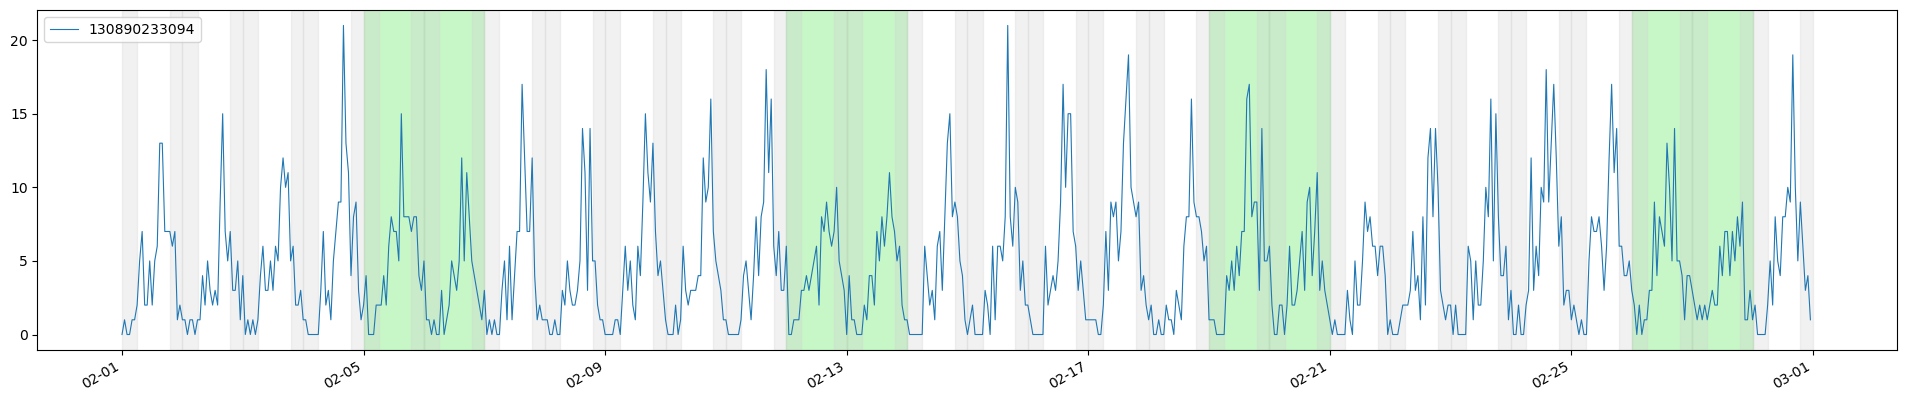

In [ ]:
parquet_dir = r'D:\Data\Advan\dewey-downloads\neighborhood-patterns_parquets'  
# file name format: 2022-01.parquet

month = 2

# load data for a month
# creat a duckdb in-memory database
con  = duckdb.connect()
con.execute(f"CREATE VIEW NP AS SELECT * FROM read_parquet('{os.path.join(parquet_dir, f'2022-{month:02d}.parquet')}')")

# select data for a specific CBG
# CBG = '130890232103'  # residential
# CBG = '130890233143'   # residential
CBG = '130890233094'    # residential , peak population: 2.5k, raw device counts: 0.7k.  ?
# CBG = '130890218061'  # workplace, peak population: 10k, raw device counts: 11k.  ?
print(f"Fetching data for CBG: {CBG}")

con.execute(f"SELECT AREA, DATE_RANGE_END, DATE_RANGE_START, RAW_DEVICE_COUNTS, RAW_STOP_COUNTS, STOPS_BY_EACH_HOUR  FROM NP WHERE AREA == {CBG}" )


df = con.fetchdf()

df['STOPS_BY_EACH_HOUR'] = df['STOPS_BY_EACH_HOUR'].str.replace(r'"', '')
raw_device_cnt = df.iloc[0]['RAW_DEVICE_COUNTS']
print( f"Raw device counts: {raw_device_cnt}" )
raw_stop_cnt = df.iloc[0]['RAW_STOP_COUNTS']
print( f"Raw stop counts: {raw_stop_cnt}" )

non_adjusted_dwell_time_stop_CBG_arr = ad_op.adjust_stop_by_dwelling_time(np_df=df.iloc[:], adjust_dwell_time=False, clean_negative=True)
non_adjusted_dwell_time_stop_CBG_arr
import calendar
year = 2022
hourly_columns = pd.date_range(start=f"{year}-{month:02}-01", end=f"{year}-{month:02}-{calendar.monthrange(year, month)[1]} 23:59:59", freq='h')
assert len(hourly_columns) == non_adjusted_dwell_time_stop_CBG_arr.shape[1], "hourly_columns and adjusted_dwell_time_stop_CBG_arr.shape[1] do not match"
stop_CBG_df = pd.DataFrame(non_adjusted_dwell_time_stop_CBG_arr, columns=hourly_columns)
stop_CBG_df['CBG'] = df['AREA'].astype(str).str.zfill(12).to_list()
# adjusted_dwelling_time_stop_CBG_df = adjusted_dwelling_time_stop_CBG_df[['CBG'] + hourly_columns]  # reorder columns
# adjusted_dwelling_time_stop_CBG_df = adjusted_dwelling_time_stop_CBG_df.sort_values('CBG')
stop_CBG_df.set_index('CBG', inplace=True)

# draw weekend span as light green
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(24,5))
stop_CBG_df.T.plot(ax=ax, lw=0.8)
weekends = pd.date_range(start=f"{year}-{month:02}-01", end=f"{year}-{month:02}-{calendar.monthrange(year, month)[1]}", freq='D').to_series()
weekends = weekends[weekends.dt.dayofweek >= 5]  # filter weekends
for weekend in weekends:
    ax.axvspan(weekend, weekend + pd.Timedelta(days=1), color='lightgreen', alpha=0.5 )

# draw the nighttime span as lightgrey (7pm to 7am)
for day in pd.date_range(start=f"{year}-{month:02}-01", end=f"{year}-{month:02}-{calendar.monthrange(year, month)[1]}", freq='D'):
    ax.axvspan(day + pd.Timedelta(hours=0), day + pd.Timedelta(hours=6), color='lightgrey', alpha=0.3 )
    ax.axvspan(day + pd.Timedelta(hours=19), day + pd.Timedelta(hours=24), color='lightgrey', alpha=0.3 )
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

# draw horizontal lines for raw device counts and raw stop counts
# ax.axhline(y=raw_device_cnt, color='r', linestyle='--', label='Raw Device Counts')
# ax.axhline(y=raw_stop_cnt, color='b', linestyle='--', label='Raw Stop Counts')
ax.legend()
plt.show()

Stop factor:  1


C:\tmp\ipykernel_2408\2143530845.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_columns = pd.date_range(start=f"{year}-{month:02}-01", end=f"{year}-{month:02}-{calendar.monthrange(year, month)[1]} 23:59:59", freq='H')


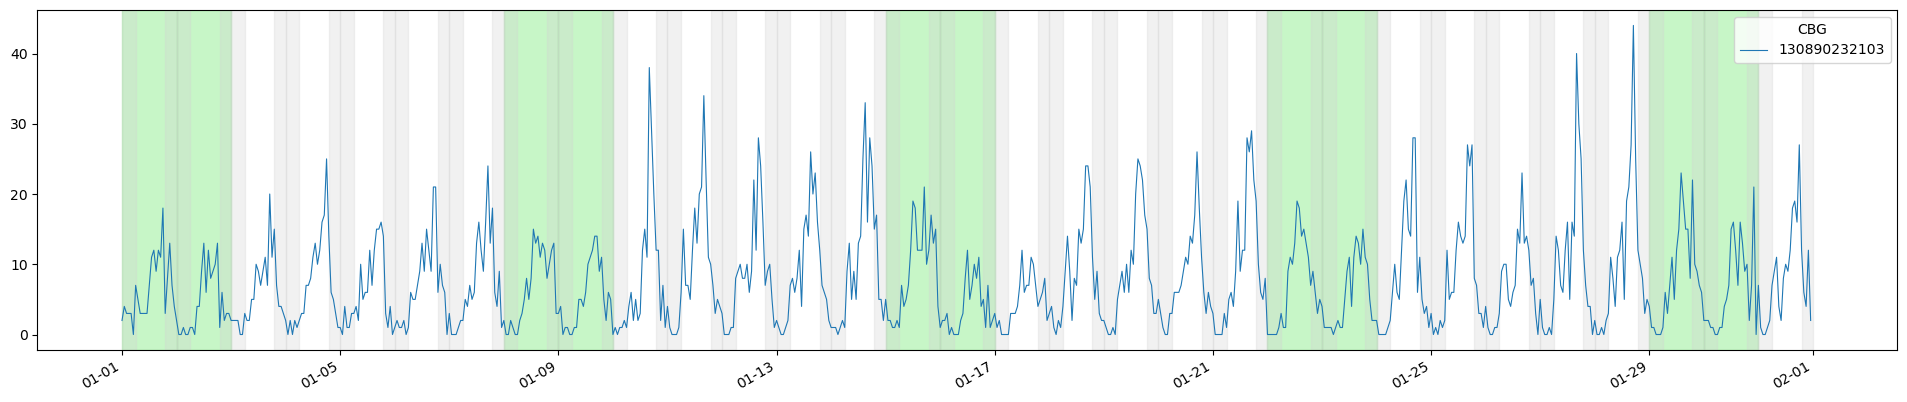

Stop factor:  1


C:\tmp\ipykernel_2408\452625594.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_columns = pd.date_range(start=f"{year}-{month:02}-01", end=f"{year}-{month:02}-{calendar.monthrange(year, month)[1]} 23:59:59", freq='H')


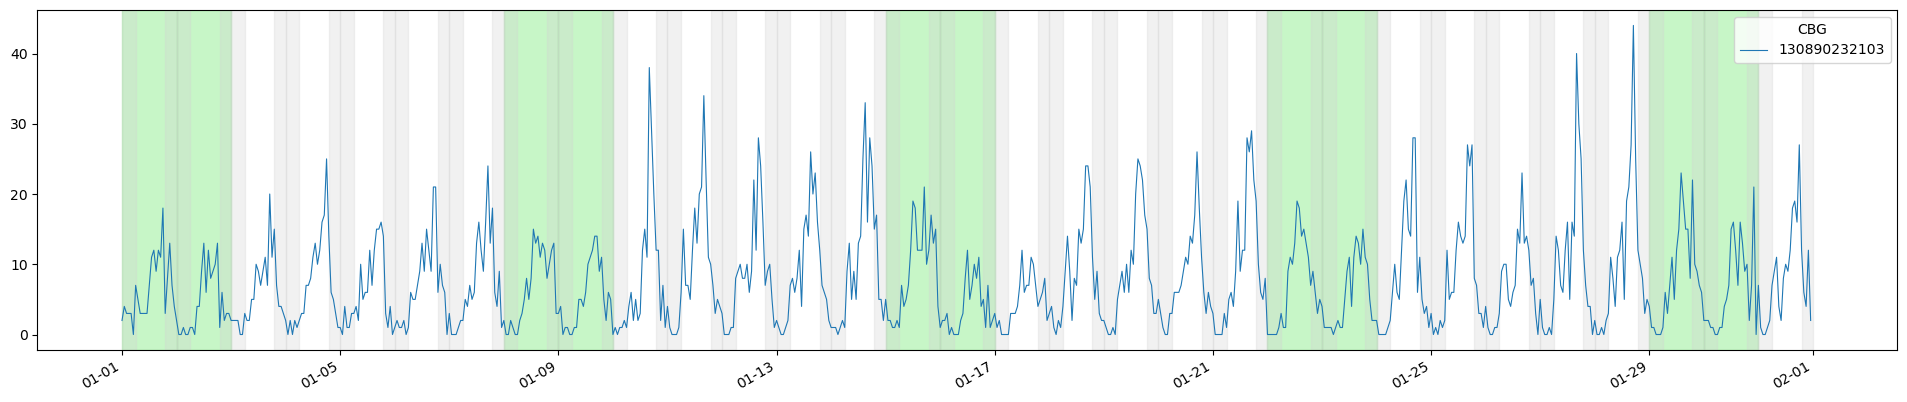

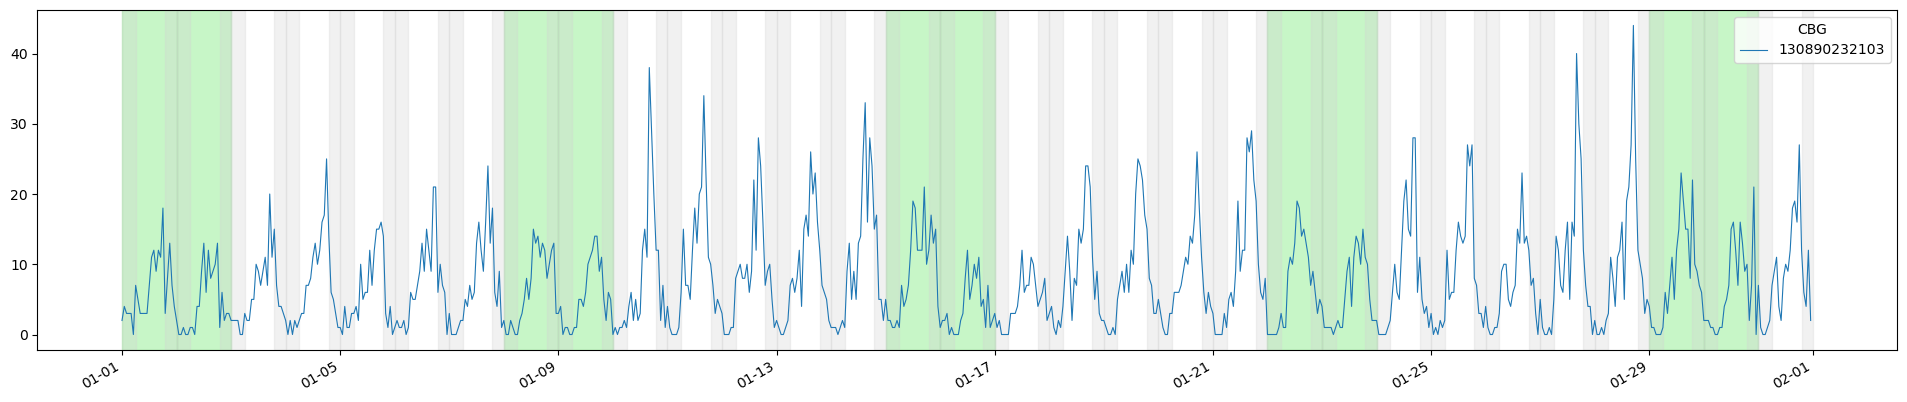

In [ ]:
# plot the data




In [1]:
%load_ext autoreload
%autoreload 2
import os
import random
import sqlite3 
import numpy as np
import json
import math
from tqdm.notebook import tqdm
from tqdm import tqdm
tqdm.pandas()

import glob

import pandas as pd
# import geopandas as gpd
import matplotlib.pyplot as plt

import Advan_operator as ad_op  

pd.set_option('display.max_columns', None)

import logging
# Create a logger
logger_name = 'all_logger'
logger = logging.getLogger(logger_name)


In [2]:
data_dir = r'F:\SafeGraph\Advan_2023_API\Neighborhood_Patterns'   # Lenovo
save_dir = r'D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test\check_results'  # Lenovo

In [3]:
month_dir_list = glob.glob(os.path.join(data_dir, '*', '*'))
print("Found month count:", len(month_dir_list))
print("Top and bottom month:")
print(month_dir_list[0])
print(month_dir_list[-1])


Found month count: 0
Top and bottom month:


IndexError: list index out of range

In [63]:
use_cols =  [
    # 'AREA', 
             # "DEVICE_HOME_AREAS",
            # "STOPS_BY_DAY", 
            "RAW_STOP_COUNTS", 
            "RAW_DEVICE_COUNTS", 
            # "MEDIAN_DWELL", 
            # "STOPS_BY_EACH_HOUR",
            ]

def read_month_CSVs(month_dir):
    month_df = ad_op.load_neighborhood_monthly_folder(folder=month_dir, extions=['gz'], use_cols=use_cols, verbose=True)
    # month_df = month_df.sort_values("AREA")
    # month_df['AREA'] = month_df['AREA'].astype(str).str.zfill(12)
    # month_df = month_df[use_cols]
    return month_df

df_list = []
for month_dir in tqdm(month_dir_list):
    month = month_dir.split(os.sep)[-1]
    year = month_dir.split(os.sep)[-2]

    print("Processing:", year, month)
    
    month_df = read_month_CSVs(month_dir)
    month_sum_df = month_df.sum().to_frame().transpose()
    month_sum_df['CBG_count'] = len(month_df)  
    month_sum_df['year_month'] = year + '-' + month
    df_list.append(month_sum_df)
    # break

df_all = pd.concat(df_list)
new_fname = os.path.join(save_dir, "neighborhood_patterns_summary.csv")
df_all.to_csv(new_fname, index=False)
df_all

  0%|                                                                                           | 0/72 [00:00<?, ?it/s]

Processing: 2018 01


  1%|█▏                                                                                 | 1/72 [00:40<48:04, 40.62s/it]

Processing: 2018 02


  3%|██▎                                                                                | 2/72 [01:21<47:39, 40.85s/it]

Processing: 2018 03


  4%|███▍                                                                               | 3/72 [02:11<51:38, 44.90s/it]

Processing: 2018 04


  6%|████▌                                                                              | 4/72 [02:59<52:27, 46.29s/it]

Processing: 2018 05


  7%|█████▊                                                                             | 5/72 [03:51<53:55, 48.29s/it]

Processing: 2018 06


  8%|██████▉                                                                            | 6/72 [04:45<55:21, 50.32s/it]

Processing: 2018 07


 10%|████████                                                                           | 7/72 [05:42<56:50, 52.47s/it]

Processing: 2018 08


 11%|█████████▏                                                                         | 8/72 [06:39<57:18, 53.73s/it]

Processing: 2018 09


 12%|██████████▍                                                                        | 9/72 [07:32<56:14, 53.56s/it]

Processing: 2018 10


 14%|███████████▍                                                                      | 10/72 [08:26<55:22, 53.59s/it]

Processing: 2018 11


 15%|████████████▌                                                                     | 11/72 [09:17<53:44, 52.86s/it]

Processing: 2018 12


 17%|█████████████▋                                                                    | 12/72 [10:10<53:03, 53.05s/it]

Processing: 2019 01


 18%|██████████████▊                                                                   | 13/72 [11:01<51:22, 52.24s/it]

Processing: 2019 02


 19%|███████████████▉                                                                  | 14/72 [11:46<48:34, 50.26s/it]

Processing: 2019 03


 21%|█████████████████                                                                 | 15/72 [12:35<47:25, 49.93s/it]

Processing: 2019 04


 22%|██████████████████▏                                                               | 16/72 [13:23<45:58, 49.26s/it]

Processing: 2019 05


 24%|███████████████████▎                                                              | 17/72 [14:14<45:38, 49.79s/it]

Processing: 2019 06


 25%|████████████████████▌                                                             | 18/72 [15:09<46:15, 51.40s/it]

Processing: 2019 07


 26%|█████████████████████▋                                                            | 19/72 [16:03<45:53, 51.96s/it]

Processing: 2019 08


 28%|██████████████████████▊                                                           | 20/72 [16:54<44:53, 51.79s/it]

Processing: 2019 09


 29%|███████████████████████▉                                                          | 21/72 [17:42<43:04, 50.67s/it]

Processing: 2019 10


 31%|█████████████████████████                                                         | 22/72 [18:27<40:44, 48.89s/it]

Processing: 2019 11


 32%|██████████████████████████▏                                                       | 23/72 [19:09<38:17, 46.88s/it]

Processing: 2019 12


 33%|███████████████████████████▎                                                      | 24/72 [19:52<36:36, 45.77s/it]

Processing: 2020 01


 35%|████████████████████████████▍                                                     | 25/72 [20:31<34:16, 43.75s/it]

Processing: 2020 02


 36%|█████████████████████████████▌                                                    | 26/72 [21:10<32:26, 42.31s/it]

Processing: 2020 03


 38%|██████████████████████████████▊                                                   | 27/72 [21:44<29:50, 39.79s/it]

Processing: 2020 04


 39%|███████████████████████████████▉                                                  | 28/72 [22:09<25:55, 35.36s/it]

Processing: 2020 05


 40%|█████████████████████████████████                                                 | 29/72 [22:41<24:34, 34.29s/it]

Processing: 2020 06


 42%|██████████████████████████████████▏                                               | 30/72 [23:17<24:23, 34.85s/it]

Processing: 2020 07


 43%|███████████████████████████████████▎                                              | 31/72 [23:55<24:29, 35.83s/it]

Processing: 2020 08


 44%|████████████████████████████████████▍                                             | 32/72 [24:34<24:26, 36.67s/it]

Processing: 2020 09


 46%|█████████████████████████████████████▌                                            | 33/72 [25:11<23:56, 36.82s/it]

Processing: 2020 10


 47%|██████████████████████████████████████▋                                           | 34/72 [25:49<23:34, 37.22s/it]

Processing: 2020 11


 49%|███████████████████████████████████████▊                                          | 35/72 [26:23<22:16, 36.11s/it]

Processing: 2020 12


 50%|█████████████████████████████████████████                                         | 36/72 [26:57<21:20, 35.57s/it]

Processing: 2021 01


 51%|██████████████████████████████████████████▏                                       | 37/72 [27:28<20:02, 34.36s/it]

Processing: 2021 02


 53%|███████████████████████████████████████████▎                                      | 38/72 [28:00<18:55, 33.40s/it]

Processing: 2021 03


 54%|████████████████████████████████████████████▍                                     | 39/72 [28:38<19:12, 34.93s/it]

Processing: 2021 04


 56%|█████████████████████████████████████████████▌                                    | 40/72 [29:15<19:00, 35.64s/it]

Processing: 2021 05


 57%|██████████████████████████████████████████████▋                                   | 41/72 [29:55<19:03, 36.88s/it]

Processing: 2021 06


 58%|███████████████████████████████████████████████▊                                  | 42/72 [30:37<19:10, 38.35s/it]

Processing: 2021 07


 60%|████████████████████████████████████████████████▉                                 | 43/72 [31:22<19:34, 40.50s/it]

Processing: 2021 08


 61%|██████████████████████████████████████████████████                                | 44/72 [32:04<19:04, 40.86s/it]

Processing: 2021 09


 62%|███████████████████████████████████████████████████▎                              | 45/72 [32:43<18:08, 40.31s/it]

Processing: 2021 10


 64%|████████████████████████████████████████████████████▍                             | 46/72 [33:25<17:36, 40.62s/it]

Processing: 2021 11


 65%|█████████████████████████████████████████████████████▌                            | 47/72 [34:04<16:44, 40.17s/it]

Processing: 2021 12


 67%|██████████████████████████████████████████████████████▋                           | 48/72 [34:44<16:04, 40.17s/it]

Processing: 2022 01


 68%|███████████████████████████████████████████████████████▊                          | 49/72 [35:20<14:53, 38.86s/it]

Processing: 2022 02


 69%|████████████████████████████████████████████████████████▉                         | 50/72 [35:56<13:58, 38.10s/it]

Processing: 2022 03


 71%|██████████████████████████████████████████████████████████                        | 51/72 [36:43<14:16, 40.79s/it]

Processing: 2022 04


 72%|███████████████████████████████████████████████████████████▏                      | 52/72 [37:32<14:27, 43.39s/it]

Processing: 2022 05


 74%|████████████████████████████████████████████████████████████▎                     | 53/72 [38:25<14:33, 45.99s/it]

Processing: 2022 06


 75%|█████████████████████████████████████████████████████████████▌                    | 54/72 [39:20<14:37, 48.75s/it]

Processing: 2022 07


 76%|██████████████████████████████████████████████████████████████▋                   | 55/72 [40:17<14:33, 51.37s/it]

Processing: 2022 08


 78%|███████████████████████████████████████████████████████████████▊                  | 56/72 [41:11<13:54, 52.15s/it]

Processing: 2022 09


 79%|████████████████████████████████████████████████████████████████▉                 | 57/72 [42:04<13:04, 52.29s/it]

Processing: 2022 10


 81%|██████████████████████████████████████████████████████████████████                | 58/72 [42:59<12:23, 53.08s/it]

Processing: 2022 11


 82%|███████████████████████████████████████████████████████████████████▏              | 59/72 [43:51<11:25, 52.69s/it]

Processing: 2022 12


 83%|████████████████████████████████████████████████████████████████████▎             | 60/72 [44:45<10:37, 53.15s/it]

Processing: 2023 01


 85%|█████████████████████████████████████████████████████████████████████▍            | 61/72 [45:33<09:29, 51.77s/it]

Processing: 2023 02


 86%|██████████████████████████████████████████████████████████████████████▌           | 62/72 [46:21<08:24, 50.50s/it]

Processing: 2023 03


 88%|███████████████████████████████████████████████████████████████████████▊          | 63/72 [47:17<07:49, 52.12s/it]

Processing: 2023 04


 89%|████████████████████████████████████████████████████████████████████████▉         | 64/72 [48:13<07:08, 53.51s/it]

Processing: 2023 05


 90%|██████████████████████████████████████████████████████████████████████████        | 65/72 [49:12<06:25, 55.01s/it]

Processing: 2023 06


 92%|███████████████████████████████████████████████████████████████████████████▏      | 66/72 [50:15<05:44, 57.46s/it]

Processing: 2023 07


 93%|████████████████████████████████████████████████████████████████████████████▎     | 67/72 [51:22<05:01, 60.30s/it]

Processing: 2023 08


 94%|█████████████████████████████████████████████████████████████████████████████▍    | 68/72 [52:26<04:05, 61.44s/it]

Processing: 2023 09


 96%|██████████████████████████████████████████████████████████████████████████████▌   | 69/72 [53:26<03:02, 60.91s/it]

Processing: 2023 10


 97%|███████████████████████████████████████████████████████████████████████████████▋  | 70/72 [54:27<02:02, 61.02s/it]

Processing: 2023 11


 99%|████████████████████████████████████████████████████████████████████████████████▊ | 71/72 [55:21<00:58, 58.76s/it]

Processing: 2023 12


100%|██████████████████████████████████████████████████████████████████████████████████| 72/72 [56:16<00:00, 46.90s/it]


,RAW_STOP_COUNTS,RAW_DEVICE_COUNTS,CBG_count,year_month
0,2684699856,563501357,217722,2018-01
0,2625206640,558037481,217723,2018-02
0,3071711107,669757222,217729,2018-03
0,3025672732,655788862,217728,2018-04
0,3334077420,708584787,217736,2018-05
...,...,...,...,...
0,4508550740,933324013,220692,2023-08
0,4226044235,850133777,220683,2023-09
0,4294441567,836536099,220665,2023-10
0,3687977977,741303047,219905,2023-11


In [65]:
df_all['year_month'] = pd.to_datetime(df_all['year_month'])
df_all.set_index('year_month', inplace=True)

<Axes: xlabel='year_month'>

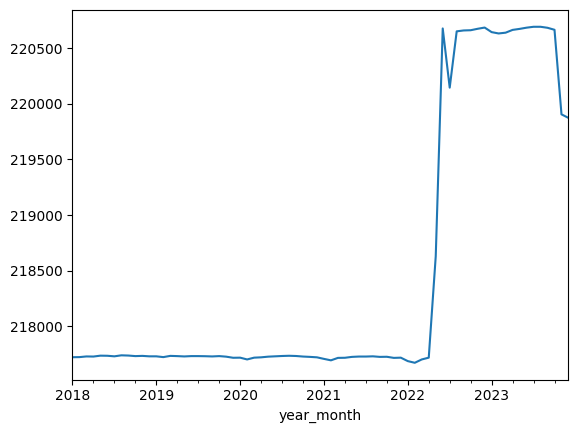

In [66]:
df_all['CBG_count'].plot()

<Axes: xlabel='year_month'>

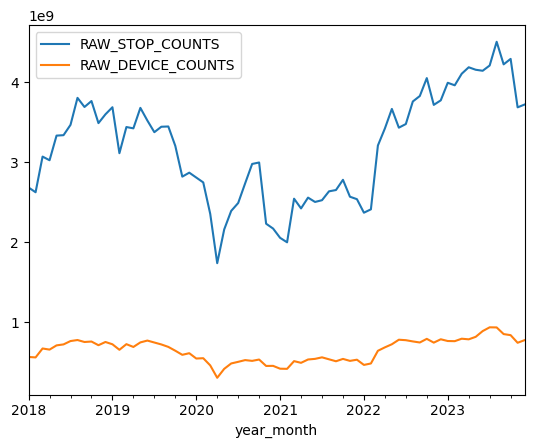

In [67]:
df_all[['RAW_STOP_COUNTS', 'RAW_DEVICE_COUNTS']].plot()

In [34]:
month_df.dropna().agg(RAW_STOP_COUNTS=('RAW_STOP_COUNTS', 'sum'),
             RAW_DEVICE_COUNTS=('RAW_DEVICE_COUNTS', 'sum'),
             CBG_count=('RAW_DEVICE_COUNTS', 'count'),                              
              
            )

,RAW_STOP_COUNTS,RAW_DEVICE_COUNTS
RAW_STOP_COUNTS,2.684700e+09,NaN
RAW_DEVICE_COUNTS,NaN,563501357.0
CBG_count,NaN,217722.0
